<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/Diabetes_Prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
#read the first 5 rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [ ]:
for column in df.columns:
  num_distinct_values = len(df[column].unique())
  print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [ ]:
for column in df.columns:
  num_dist = (df[column].value_counts())
  print(f"{column}: {num_dist} values")

gender: Female    58552
Male      41430
Other        18
Name: gender, dtype: int64 values
age: 80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64 values
hypertension: 0    92515
1     7485
Name: hypertension, dtype: int64 values
heart_disease: 0    96058
1     3942
Name: heart_disease, dtype: int64 values
smoking_history: No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64 values
bmi: 27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64 values
HbA1c_level: 6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    

In [ ]:
df.isnull().sum()    #no missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# check any duplicated data
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [ ]:
df.duplicated().sum()

3854

In [ ]:
df= df.drop_duplicates()

In [ ]:
df.shape

(96146, 9)

Data Visualisation

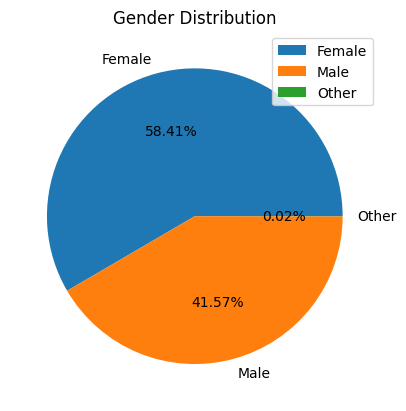

In [ ]:
# Calculate the frequencies of each gender category
gender_counts = df['gender'].value_counts()


# Plot as a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.legend()
plt.show()


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Distribution of categorical variable

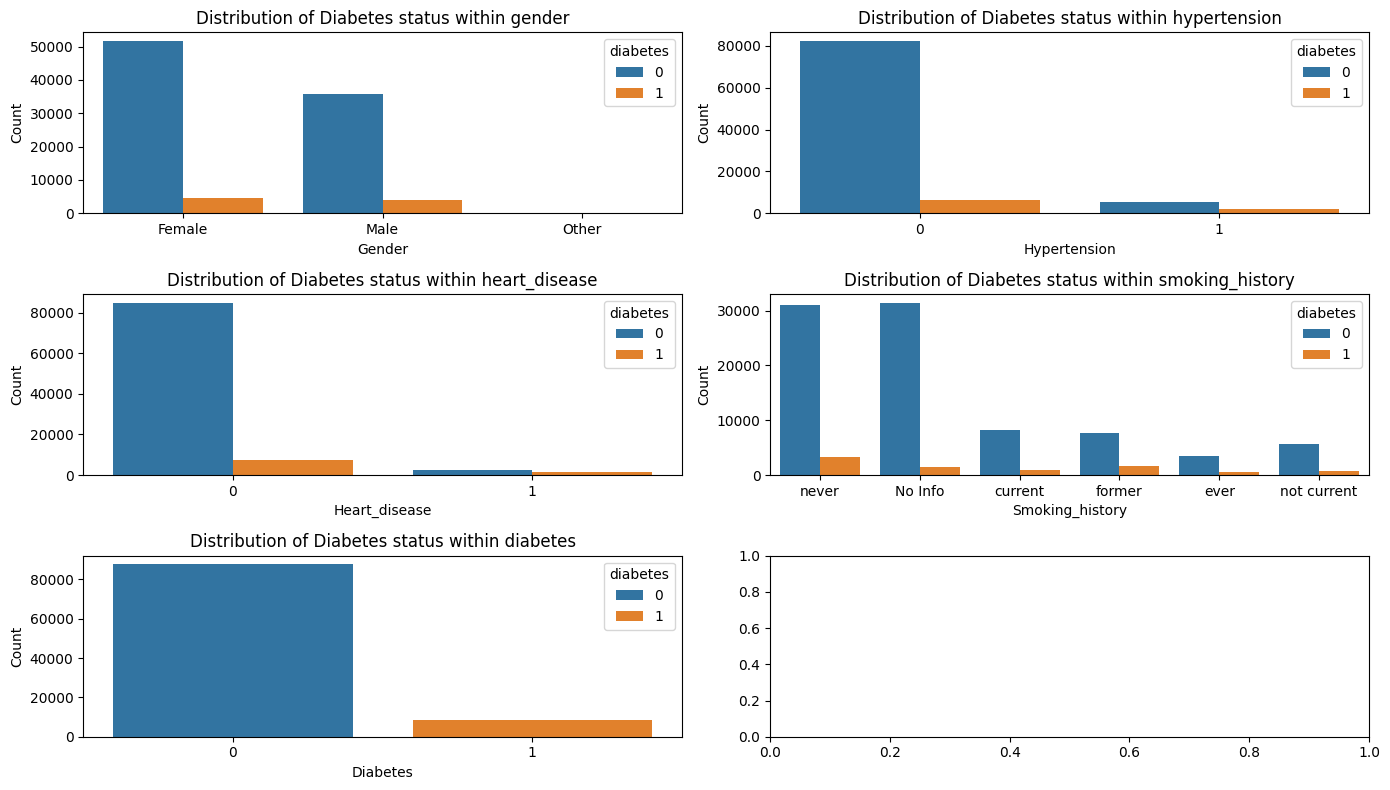

In [ ]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

# Create subplot - useful to display multiple plots within the same figure, this creates 2 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))

# Iterate through each categorical feature
for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2

    # Plot the distribution
    sns.countplot(x=feature, data=df, hue='diabetes', ax=axes[row, col])

    # Set titles and labels
    axes[row, col].set_title(f'Distribution of Diabetes status within {feature}')
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


Distribution of numerical variable

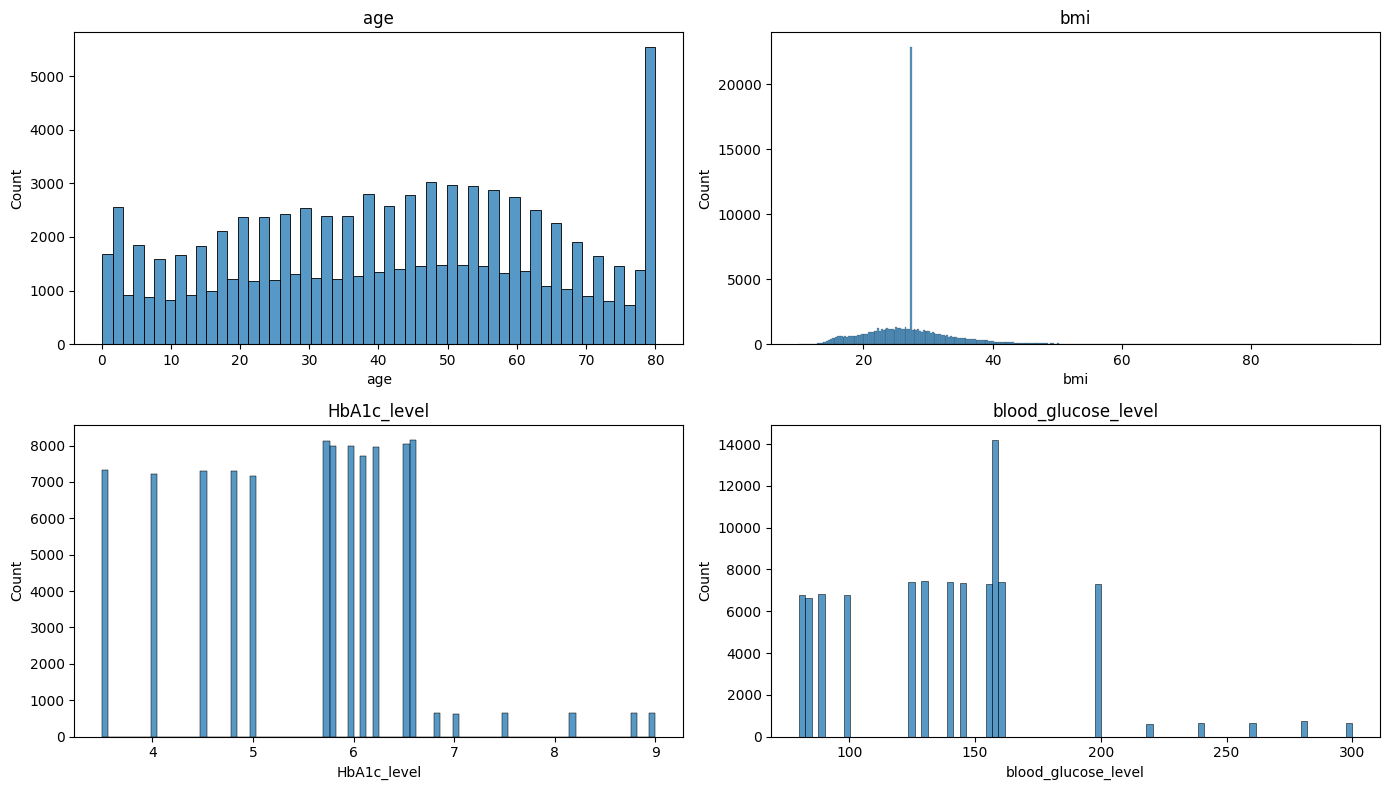

In [ ]:
#create subplot
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,8))

numerical_features= ['age','bmi','HbA1c_level','blood_glucose_level']

#iterate numerical features
for n, feature in enumerate(numerical_features):
  row = n//2       # arrangement of the multiple plot
  col =n%2

  #Plot the distribution of the plot
  sns.histplot(x=feature, data=df, ax=axes[row,col])

  #set titles and label
  axes[row,col].set_title(f'{feature}')

plt.tight_layout()
plt.show()






In [ ]:
df['bmi'].mode()

0    27.32
Name: bmi, dtype: float64

In [ ]:
df['blood_glucose_level'].mode()

0    159
Name: blood_glucose_level, dtype: int64

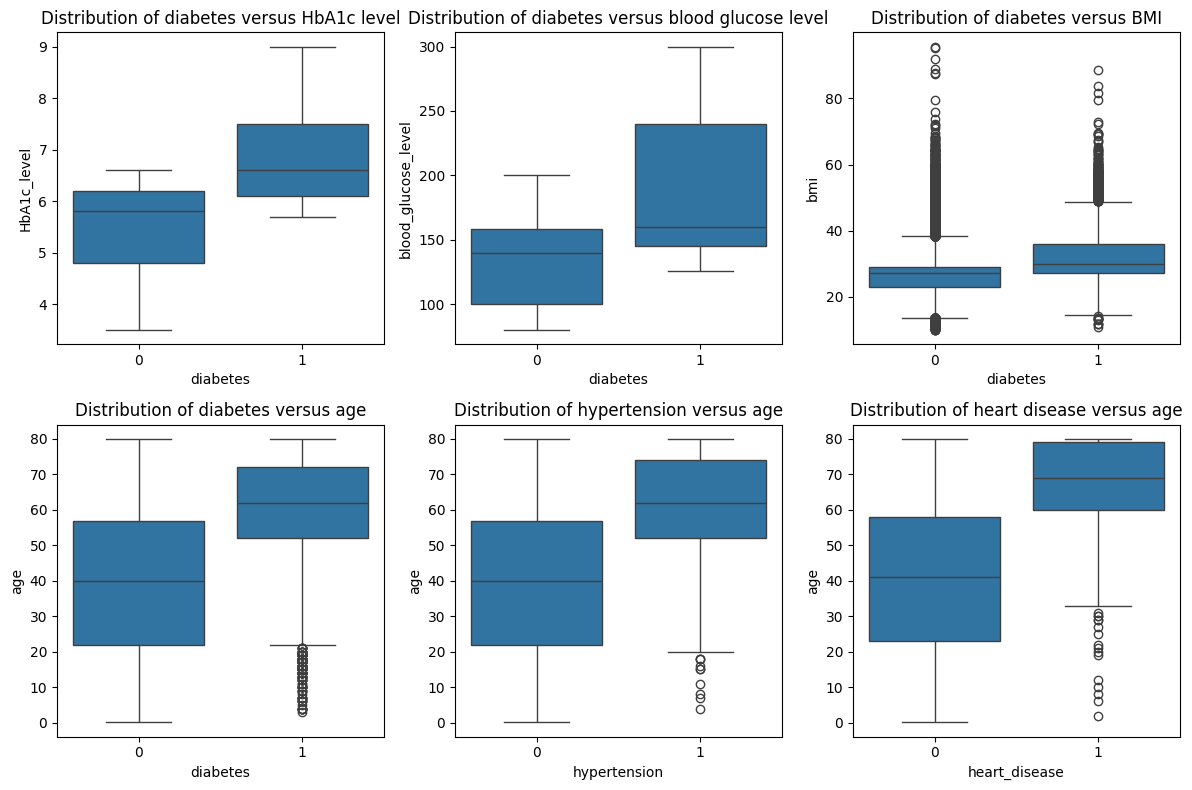

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Create box plots for each variable
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of diabetes versus HbA1c level')
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of diabetes versus blood glucose level')
sns.boxplot(x='diabetes', y='bmi', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of diabetes versus BMI')
sns.boxplot(x='diabetes', y='age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of diabetes versus age')
sns.boxplot(x='hypertension', y='age', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of hypertension versus age')
sns.boxplot(x='heart_disease', y='age', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of heart disease versus age')

plt.tight_layout()
plt.show()


We can see that Diabetes is more common in people with high HbA1c level and Blood glucose level.
We can notice that excluding outliers, the youngest age frame for patients with hypertension and diabetes is 20 years, which means that patients aged 20 and above are more prone diabetes and hypertension.
Older people are more prone to heart disease.

In [ ]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


<ipython-input-23-17a90bab3fd3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

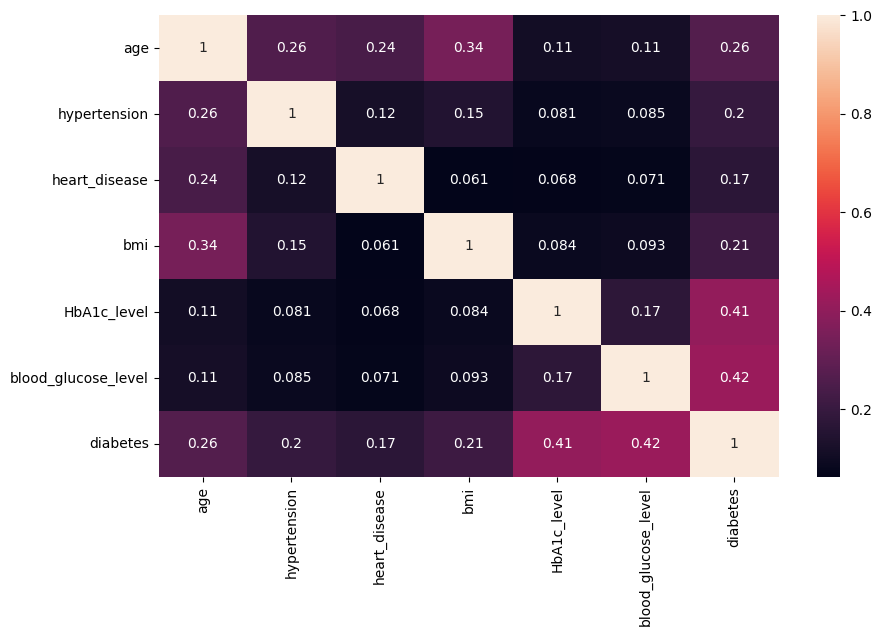

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Data Preprocessing

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146,96146.000000,96146.000000,96146.000000,96146,96146.000000,96146.000000,96146.000000,96146.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,never,NaN,NaN,NaN,NaN
freq,56161,NaN,NaN,NaN,34398,NaN,NaN,NaN,NaN
mean,NaN,41.794326,0.077601,0.040803,NaN,27.321461,5.532609,138.218231,0.088220
std,NaN,22.462948,0.267544,0.197833,NaN,6.767716,1.073232,40.909771,0.283616
min,NaN,0.080000,0.000000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,29.860000,6.200000,159.000000,0.000000


In [ ]:
#convert categorical variable into numberical variable

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to be label encoded
le_category = ['gender', 'smoking_history']

# Apply label encoding to the specified columns in the DataFrame
df[le_category] = df[le_category].apply(lambda x: le.fit_transform(x))

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_column= ['age', 'bmi','HbA1c_level', 'blood_glucose_level']

df[std_column] = scaler.fit_transform(df[std_column])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.700840,0,1,4,-0.314947,0.994563,0.043554,0
1,0,0.543372,0,0,0,-0.000216,0.994563,-1.423096,0
2,1,-0.614096,0,0,4,-0.000216,0.155970,0.483549,0
3,0,-0.257952,0,0,1,-0.572051,-0.496269,0.410216,0
4,1,1.522768,1,1,1,-1.061141,-0.682623,0.410216,0


In [ ]:
y= df['diabetes']

0    87664
1     8482
Name: diabetes, dtype: int64


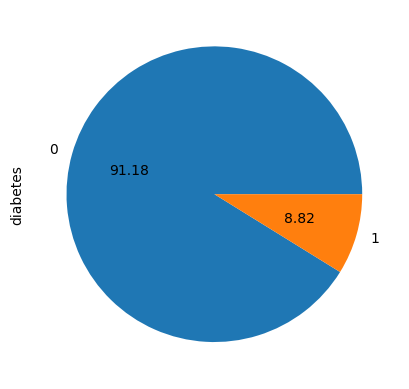

In [ ]:
y.value_counts().plot.pie(autopct="%.2f")

print(y.value_counts())

In [ ]:
x= df.iloc[: ,:-1]

In [ ]:
#split train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=42)


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(67302, 8) (28844, 8) (67302,) (28844,)


In [ ]:
print(y_train.shape, y_test.shape)

(67302,) (28844,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming x_train and y_train are your training data
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create a pipeline with RandomOverSampler and AdaBoostClassifier
pipeline = make_pipeline(RandomOverSampler(random_state=42), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42))

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Predictions
y_pred = pipeline.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12332
           1       0.73      0.73      0.73      1129

    accuracy                           0.95     13461
   macro avg       0.85      0.85      0.85     13461
weighted avg       0.95      0.95      0.95     13461



In [ ]:
#1 Randome undersampling  (not minority = resample all classes but the minority class)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
# rus = RandomUnderSample(sampling_strategy = 'not minority')

X_res,y_res = rus.fit_resample(x,y)



0    8482
1    8482
Name: diabetes, dtype: int64


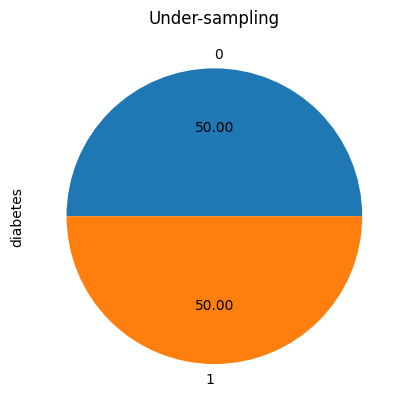

In [ ]:
#plot pie chart for the new random undersampling
ax= y_res.value_counts().plot.pie(autopct="%.2f")
ax.set_title('Under-sampling')

print(y_res.value_counts())


In [ ]:
#split train and test
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1= train_test_split(X_res,y_res, test_size=0.3,random_state=42)


In [ ]:
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(11874, 8) (5090, 8) (11874,) (5090,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Iterate through classifiers, fit, and evaluate them
for name, classifier in classifiers:
    classifier.fit(x_train1, y_train1)
    y_pred1 = classifier.predict(x_test1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test1, y_pred1)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")

    # Display classification report
    report = classification_report(y_test1, y_pred1)
    print(f"Classification Report:\n{report}")

    # Display confusion matrix
    confusion = confusion_matrix(y_test1, y_pred1)
    print(f"Confusion Matrix:\n{confusion}")
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2592
           1       0.88      0.89      0.89      2498

    accuracy                           0.89      5090
   macro avg       0.89      0.89      0.89      5090
weighted avg       0.89      0.89      0.89      5090

Confusion Matrix:
[[2301  291]
 [ 275 2223]]
Model: Decision Tree
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2592
           1       0.87      0.89      0.88      2498

    accuracy                           0.88      5090
   macro avg       0.88      0.88      0.88      5090
weighted avg       0.88      0.88      0.88      5090

Confusion Matrix:
[[2266  326]
 [ 267 2231]]
Model: Random Forest
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0      

In [ ]:
#2 Randome oversampling (ros) (not majority = resample all classes but the majority class)

from imblearn.over_sampling import RandomOverSampler

ros= RandomOverSampler(sampling_strategy='not majority')
x_ros,y_ros =ros.fit_resample(x,y)

0    87664
1    87664
Name: diabetes, dtype: int64


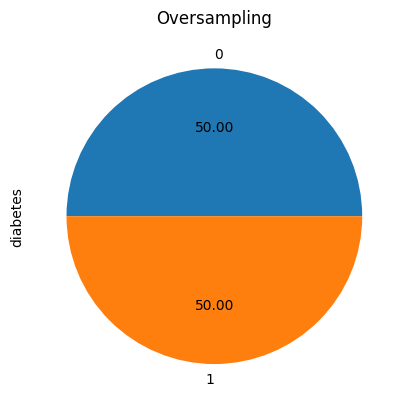

In [ ]:
#plot pie for random oversampling

ax= y_ros.value_counts().plot.pie(autopct='%.2f')
ax.set_title('Oversampling')

print(y_ros.value_counts())

In [ ]:
#split train and test
from sklearn.model_selection import train_test_split

x_train2,x_test2,y_train2,y_test2= train_test_split(x_ros,y_ros, test_size=0.3,random_state=42)


In [ ]:
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Iterate through classifiers, fit, and evaluate them
for name, classifier in classifiers:
    classifier.fit(x_train2, y_train2)
    y_pred2 = classifier.predict(x_test2)

    # Calculate accuracy
    accuracy = accuracy_score(y_test2, y_pred2)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")

    # Display classification report
    report = classification_report(y_test2, y_pred2)
    print(f"Classification Report:\n{report}")

    # Display confusion matrix
    confusion = confusion_matrix(y_test2, y_pred2)
    print(f"Confusion Matrix:\n{confusion}")
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     26235
           1       0.89      0.88      0.88     26364

    accuracy                           0.88     52599
   macro avg       0.88      0.88      0.88     52599
weighted avg       0.88      0.88      0.88     52599

Confusion Matrix:
[[23246  2989]
 [ 3244 23120]]
Model: Decision Tree
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     26235
           1       0.96      1.00      0.98     26364

    accuracy                           0.98     52599
   macro avg       0.98      0.98      0.98     52599
weighted avg       0.98      0.98      0.98     52599

Confusion Matrix:
[[25278   957]
 [    2 26362]]
Model: Random Forest
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

          